## Linear Regression with Gradient Descent
### Part A: (Datasets):You are required to pre-process the datasets by following these steps:


In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

#### A1)Convert any non-numeric values to numeric values. For example you can replace a country name with an integer value or more appropriately use hot-one encoding. [Hint: use pandas.get_dummies]. Please explain your solution
1)The file is read into "air_df using .read_csv separated by space<br>
2)Non numeric columns are obtained using "list(air_df.select_dtypes(['object']).columns)". Non numeric columns value is of data type object.<br>
3)The non numeric columns are given to columns list of pd.get_dummies<br>
4)pd.get_dummies function of pandas is used to convert the non numeric variables into dummy values. This fuction drops our originlal non numeric columns 

https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html

In [2]:
column_names =['City1','City2','AvgFare','Distance','AvgWeekPrgrs',
          'MktLeadArLn','MktShare','AvgFare2','LowPriceArLn','MktShare2','Price']
air_df= pd.read_csv("airq402.data",sep ='\s+', names=column_names)
air_df.head()

,City1,City2,AvgFare,Distance,AvgWeekPrgrs,MktLeadArLn,MktShare,AvgFare2,LowPriceArLn,MktShare2,Price
0,CAK,ATL,114.47,528,424.56,FL,70.19,111.03,FL,70.19,111.03
1,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
2,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
3,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86
4,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42


In [3]:
#Convert any non-numeric values to numeric values
non_numeric_columns=list(air_df.select_dtypes(['object']).columns) # getting list of columns of object data type
#Using get_dummies
air_df= pd.get_dummies(air_df, columns=non_numeric_columns)
air_df.head()

,AvgFare,Distance,AvgWeekPrgrs,MktShare,AvgFare2,MktShare2,Price,City1_ABQ,City1_ACY,City1_ALB,...,LowPriceArLn_G4,LowPriceArLn_HP,LowPriceArLn_NK,LowPriceArLn_NW,LowPriceArLn_SY,LowPriceArLn_TZ,LowPriceArLn_UA,LowPriceArLn_US,LowPriceArLn_WN,LowPriceArLn_YX
0,114.47,528,424.56,70.19,111.03,70.19,111.03,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,122.47,860,276.84,75.10,123.09,17.23,118.94,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,214.42,852,215.76,78.89,223.98,2.77,167.12,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,69.40,288,606.84,96.97,68.86,96.97,68.86,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,158.13,723,313.04,39.79,161.36,15.34,145.42,0,0,1,...,0,0,0,0,0,0,0,0,1,0


#### A2. If required drop out the rows with missing values or NA. In next lectures we will handle sparse data, which will allow us to use records with missing values.
1)To drop rows that contain the missing values, dropna() is used.<br>
2)The air_df has no missing values. The shapes are same after dropping.

In [4]:
# Dropping missing values
print(f"shape of air_df before dropping missing values:{air_df.shape}")
air_df.dropna(inplace=True)
print(f"shape of air_df after dropping missing values:{air_df.shape}")

shape of air_df before dropping missing values:(1000, 217)
shape of air_df after dropping missing values:(1000, 217)


In [5]:
air_df.corr()

,AvgFare,Distance,AvgWeekPrgrs,MktShare,AvgFare2,MktShare2,Price,City1_ABQ,City1_ACY,City1_ALB,...,LowPriceArLn_G4,LowPriceArLn_HP,LowPriceArLn_NK,LowPriceArLn_NW,LowPriceArLn_SY,LowPriceArLn_TZ,LowPriceArLn_UA,LowPriceArLn_US,LowPriceArLn_WN,LowPriceArLn_YX
AvgFare,1.000000,0.587169,-0.126175,-0.234142,0.981462,-0.458660,0.866410,-0.015512,-0.043395,-0.024907,...,-0.023987,0.120318,-0.060285,0.070318,0.045435,0.032484,0.157407,0.135060,-0.383648,0.019288
Distance,0.587169,1.000000,-0.090131,-0.531406,0.564082,-0.367831,0.583239,-0.019194,-0.012393,0.026510,...,-0.022292,0.131914,0.024836,0.040402,0.046385,0.042391,0.016713,-0.027004,-0.218735,-0.014731
AvgWeekPrgrs,-0.126175,-0.090131,1.000000,-0.067605,-0.100946,0.034241,-0.142314,-0.046326,-0.027180,-0.041919,...,-0.015980,-0.010447,0.136523,-0.056569,0.012058,0.225821,-0.088678,-0.067905,0.020247,-0.018707
MktShare,-0.234142,-0.531406,-0.067605,1.000000,-0.220801,0.306832,-0.307672,0.039731,0.123685,-0.020080,...,-0.008562,-0.012376,-0.006541,-0.059734,0.000750,-0.135279,0.070145,0.056783,0.140842,-0.010773
AvgFare2,0.981462,0.564082,-0.100946,-0.220801,1.000000,-0.472838,0.826511,-0.019783,-0.041540,-0.022720,...,-0.037346,0.116697,-0.064026,0.071489,0.057073,0.052165,0.159428,0.119931,-0.377977,0.016795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LowPriceArLn_TZ,0.032484,0.042391,0.225821,-0.135279,0.052165,-0.085219,-0.057155,-0.025400,-0.011889,-0.016848,...,-0.005936,-0.046552,-0.023923,-0.034657,-0.015752,1.000000,-0.045260,-0.062883,-0.102534,-0.010291
LowPriceArLn_UA,0.157407,0.016713,-0.088678,0.070145,0.159428,-0.120865,0.108960,-0.032662,-0.015289,-0.021665,...,-0.007633,-0.059862,-0.030763,-0.044567,-0.020255,-0.045260,1.000000,-0.080862,-0.131851,-0.013234
LowPriceArLn_US,0.135060,-0.027004,-0.067905,0.056783,0.119931,-0.054411,0.083681,-0.045380,-0.021241,0.007153,...,-0.010605,-0.083171,-0.042741,-0.061919,-0.028142,-0.062883,-0.080862,1.000000,-0.183189,-0.018386
LowPriceArLn_WN,-0.383648,-0.218735,0.020247,0.140842,-0.377977,0.407897,-0.319557,0.068990,-0.034635,0.057616,...,-0.017292,-0.135615,-0.069692,-0.100963,-0.045887,-0.102534,-0.131851,-0.183189,1.000000,-0.029980


#### A4) Are there any columns that can be dropped? if so, which ones are why

1)We can drop the colmns that are less correlated with the target i.e "Price"<br>
2)I defined a function " chosing_corr_columns" that takes data frame, target variable, and cutoff of correlated score" as inputs.<br>
3)In the function, target_index i.e index of "price" is stored in target_ind using .ger_loc<br>
4)correlation matrix is obtained using df.corr()<br>
5)By iterating through each row of the matrix, and each column of the 'Price' column of the correlated matrix,
absolute value of each element in the corresponding index using "corrMatrix.iloc[i,target_ind]" is checked to be greater than or equal to cutoff. If satisfies, the corresponding row index is added to the correlated columns list.<br>
6)If not satisfied, the same is added to the non correlated list.<br>
7)The target column is removed from the correlated columns list using drop.<br>
8)Here I took, 0.5 as cutoff.<br>
I got correlated columns as ['AvgFare', 'Distance', 'AvgFare2']<br>
9)All non correlated columns are printed below.


In [6]:
def chosing_corr_columns(df,target,cutoff):
    target_ind = df.columns.get_loc(target)
    corrMatrix=df.corr().round(2)
    ind_list=[]
    dropped_index_list=[]
    for i in range(corrMatrix.shape[0]):
        if abs(corrMatrix.iloc[i,target_ind])>=abs(cutoff):
            ind_list.append(i)
        else:
            dropped_index_list.append(i)
    corr_columns= df.columns[ind_list].drop(target)
    non_corr_columns=df.columns[dropped_index_list]
    return corr_columns,non_corr_columns

corr_columns_air,non_corr_columns_air=chosing_corr_columns(air_df,'Price',0.5)
print(f"Columns that can be dropped:{non_corr_columns_air}")

print(f"Columns that can be retained:{corr_columns_air}")

Columns that can be dropped:Index(['AvgWeekPrgrs', 'MktShare', 'MktShare2', 'City1_ABQ', 'City1_ACY',
       'City1_ALB', 'City1_AMA', 'City1_ATL', 'City1_AUS', 'City1_BDL',
       ...
       'LowPriceArLn_G4', 'LowPriceArLn_HP', 'LowPriceArLn_NK',
       'LowPriceArLn_NW', 'LowPriceArLn_SY', 'LowPriceArLn_TZ',
       'LowPriceArLn_UA', 'LowPriceArLn_US', 'LowPriceArLn_WN',
       'LowPriceArLn_YX'],
      dtype='object', length=213)
Columns that can be retained:Index(['AvgFare', 'Distance', 'AvgFare2'], dtype='object')


#### A3. Split the dataset into 80% Train set and 20% Test set.

xdata is prepared with only correlated columns.<br>
ydata is prepared with 'Price', the target column

1)For splitting, I defined a function "train_test_split(xdata,ydata)"<br>
2)x_data is splitted into 80% using ".sample(frac=0.8)"<br>
3)balance 20 percent is added to test_data ,by dropping the corresponding indexes of train data in total data frame<br>
4)All are converted into numpy arrays. Then bias is added to x_train and x_test. 

In [7]:
ydata_air = air_df[['Price']]
xdata_air= air_df[corr_columns_air]

In [8]:
# function for prepARING train and test data
def train_test_split(xdata,ydata):
 # sampling data frame
    x_train=xdata.sample(frac=0.8,random_state=0)
    x_test=xdata.drop(x_train.index)
 # preparing y data
    y_train=ydata.sample(frac=0.8,random_state=0)
    y_test=ydata.drop(y_train.index)
 #converting df into arrays 
    x_train =x_train.to_numpy()
    x_test=x_test.to_numpy()
    y_train=y_train.to_numpy()
    y_test=y_test.to_numpy()
 #adding bias to xdata
    ones_train= np.ones((x_train.shape[0],1))
    ones_test= np.ones((x_test.shape[0],1)) 
    x_train =np.concatenate((ones_train,x_train),axis=1)
    x_test=np.concatenate((ones_test,x_test),axis=1)
    return x_train,x_test,y_train,y_test

x_train_a,x_test_a,y_train_a,y_test_a=train_test_split(xdata_air,ydata_air)
print(x_train_a.shape,x_test_a.shape,y_train_a.shape,y_test_a.shape)

(800, 4) (200, 4) (800, 1) (200, 1)


## Part B: Linear Regression with Real-World Data

In this part you are required to implement linear regression algorithm with gradient descent algorithm.

$yhat=x*betas$<br>
$\begin{aligned}
f(\hat{\beta}) &:=\hat{\beta}^{T} X^{T} X \hat{\beta}-2 y^{T} X \hat{\beta}+y^{T} y \\
&=(y-X \hat{\beta})^{T}(y-X \hat{\beta})
\end{aligned}$<br>

$l(x, y)=\sum_{n=1}^{N}\left(y^{n}-\hat{y}^{n}\right)^{2}$

$\frac{\partial f}{\partial \hat{\beta}}(\hat{\beta})=-2 X^{T}(y-X \hat{\beta})$

Functions are defined as per the abve equations

In [15]:
def y_hat(x,beta):
    return x@beta
#Least square loss function
def f(x_train,y_train,betas):
    error=y_train-np.matmul(x_train,betas)
    error=error.flatten()
    return np.matmul(error.T,error)

def grad_f(x,y,betas):
    return -2*x.T@(y-x@betas)

def gradient_desc(x_train,y_train,betas,mu):
    x_T=x_train.T  
    error=y_train-y_hat(x_train,betas)
    d_beta=-2*np.matmul(x_T,error)
    betas-=mu*d_beta
    return betas



**Minimize the loss function l(x, y) using Gradient Descent algorithm. Implement (learn-linregGD
and minimize-GD algorithms given in the lecture slides). Choose imax between 100 to 1000. Explain
your choice [hint: the following plots might be useful in your choice.]**
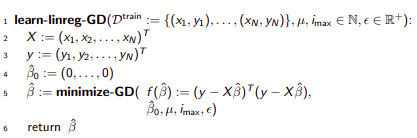

A function "learn_linregGD" is defined as per gradient Descent algorithm and the learn-linearGD as shown above.<br>
1)In this, betas of shape Mx1 is created. Two lists "abs_loss_difference" and "RMSE" are created.<br>
2)for each iteration, loss function f1 before updating parameters is calculated using the defined loss function "f"<br>
3) betas are updated from the predefined function of "gradient_desc"<br>
4) Again new loss function value "f2" is calculated.<br> 
5) Comparing f1 and f2,if the ddifference between the losses is less than epsilon i.e if the loss does not reduce noticably..we will break the loop.<br>
6)For plotting absolute losss difference i.e abs(f1-f2)and RMSE on test set, in each iteration, the related values are calculated and then appended to the corresponding lists.<br>
7) Subplot method is used for plotting. Defined functions for plotting Rabsolute loss difference and RMSE

In [16]:
#Linear Regression model
def learn_linregGD(x_train,x_test,y_train,y_test,step,imax,epsilon):
    betas=np.ones((x_train.shape[1],1))
    abs_loss=[]
    RMSE=[]
    for i in range(imax):
        mu=step
        f1=f(x_train,y_train,betas)
        
        ##updating parameters using Gradient descent
        betas=gradient_desc(x_train,y_train,betas,mu)

        f2=f(x_train,y_train,betas)
        
        #f1-f2
        x=abs(f1-f2)
        abs_loss.append(x)
        # RMSE:
        RMSE.append(np.sqrt(np.mean((x_test@betas)-y_test)**2))
        if abs(f1-f2) < epsilon:
            break
    return betas,abs_loss,RMSE

#plotting
def plotting_loss_diff(alpha_list,abs_loss_list):
    fig, axs = plt.subplots(1,3, figsize=(20, 5))
    axs = axs.ravel()
    for i in range(len(alphas)):
        axs[i].set_title(f"Iteration vs loss diff on train data at alpha ={alpha_list[i]}")        
        axs[i].plot(abs_loss_list[i])
    plt.show()
    
def plotting_rmse_test(alpha_list,RMSE_list):
    fig, axs = plt.subplots(1,3, figsize=(20, 5))
    axs = axs.ravel()
    for i in range(len(alphas)):
        axs[i].set_title(f"Iteration vs RMSE on test set at alpha = ={alpha_list[i]}")        
        axs[i].plot(RMSE_list[i])
    plt.show()

#### You can choose three suitable values of step length α > 0. For each value of step length perform the learning and record
**1)In each iteration of the minimize-GD algorithm calculate |f(xi−1) − f(xi)| and (when imax is
reached), plot it against iteration number i. Explain the graph.**
**Approach**

**For airq dataset**<br>
1) Steplengths, alpha=[1e-10,5e-10,1e-11] is chosen<br>
2) For each step length, the loss function is minimised and betas are evaluated using the function"learn_linregGD"<br>
3) The imax iterations is chosen by observing the following plots at different count of iterations from 100 to 1000<br>
4)plot between iteration and absolute loss difference is plotted for each step length.<br>
5)Comments are added below the graphs

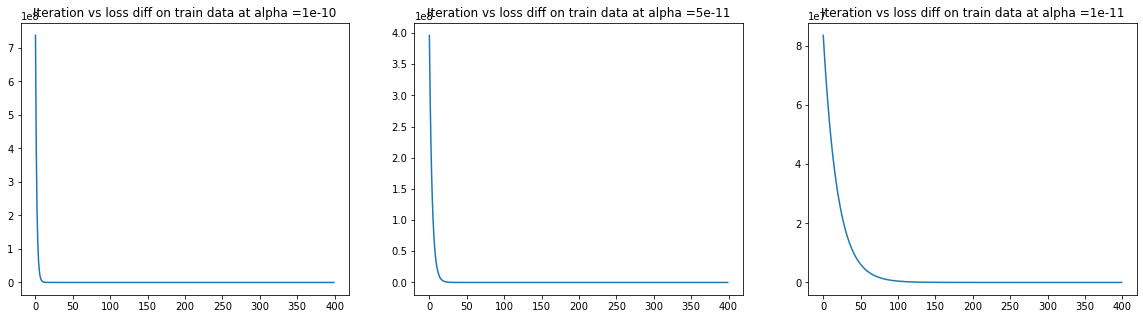

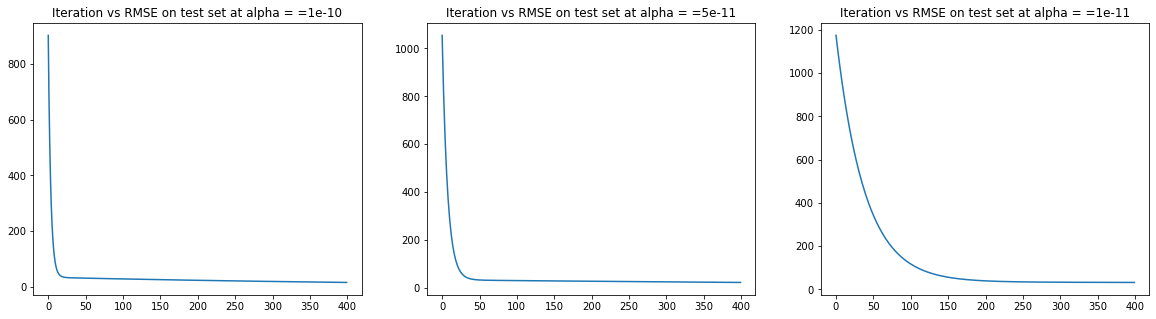

From the above airdata plots it is observed that
1) For step length 1e-10,absolute loss difference converges at around 15 iterations,
 RMSE converges at 25 iterations
 So imax can be chosen as 25 iterations for step length 1e-10
--------------------------------------------
2) For step length 5e-11,absolute loss difference converges at around 20 iterations,
 RMSE converges at 50 iterations
 So imax can be chosen as 50 iterations for step length 5e-11
--------------------------------------------
3) For step length 1e-11,absolute loss difference converges at around 125 iterations,
 RMSE converges at 350 iterations
 So imax can be chosen as 350 iterations for step length 1e-11
--------------------------------------------
From the above analysis on plots, step length 1e-10 can be chosen among the others, for training, as it requires minimum number of iterations to converge


In [17]:
#betas of airqfor 
abs_loss_a_list=[]
rmse_a_list=[]
alphas = [1e-10,5e-11,1e-11]
for i in range(len(alphas)):
    betas_a,abs_loss_a,RMSE_a=learn_linregGD(x_train_a,x_test_a,y_train_a,y_test_a,alphas[i],400,1)
    abs_loss_a_list.append(abs_loss_a)
    rmse_a_list.append(RMSE_a)
plotting_loss_diff(alphas,abs_loss_a_list)
plotting_rmse_test(alphas,rmse_a_list)

print("From the above airdata plots it is observed that")
print("1) For step length 1e-10,absolute loss difference converges at around 15 iterations,")
print(" RMSE converges at 25 iterations")
print(" So imax can be chosen as 25 iterations for step length 1e-10")
print("--------------------------------------------")

print("2) For step length 5e-11,absolute loss difference converges at around 20 iterations,")
print(" RMSE converges at 50 iterations")
print(" So imax can be chosen as 50 iterations for step length 5e-11")
print("--------------------------------------------")
print("3) For step length 1e-11,absolute loss difference converges at around 125 iterations,")
print(" RMSE converges at 350 iterations")
print(" So imax can be chosen as 350 iterations for step length 1e-11")
print("--------------------------------------------")
print("From the above analysis on plots, step length 1e-10 can be chosen among the others, for training, as it requires minimum number of iterations to converge")

## Exercise 3: Steplength Control for Gradient Descent

**This task is based on the Gradient Descent algorithm above. You have to implement the following steplength controlling algorithms:**
### 1. steplength-backtracking


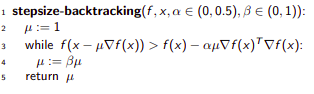

1) Defined a function named "backtracking" to update steplength "mu"<br>
2) As per the above algorithm, while loop is used and loss functions as above are compared<br>.
3) If the condition satisfies,step length is multiplied by a fraction i.e beta  to reduce the steplength.<br>
4) This backtracking mechanism  is added in main function of learning betas i.e "betas_back". <br>
5) In each iteration,steplength is obtained by "backtracking" function with updated betas. <br>

In [20]:
def backtracking(alpha,bt,x,y,betas):
    mu = 1
    d_beta=grad_f(x,y,betas) #gradient of f w.r.t to beta
    while f(x,y,betas - mu*d_beta) > (f(x,y,betas) - alpha*mu*(d_beta.T@d_beta)):
        mu = bt*mu
    return mu

In [21]:
def betas_back(x_train,x_test,y_train,y_test,mu,alpha,bt,imax,epsilon):

    betas=np.zeros((x_train.shape[1],1))
    abs_loss=[]
    RMSE=[]
    for i in range(imax):
        mu=mu
        f1=f(x_train,y_train,betas)
    
        #updating steplength using backtracking
        mu=backtracking(alpha,bt,x_train,y_train,betas)
        #updating parameters:Gradient descent
        betas=gradient_desc(x_train,y_train,betas,mu)
        
        f2=f(x_train,y_train,betas)
        #f1-f2
        x=abs(f1-f2)
        abs_loss.append(x)
        # RMSE:
        RMSE.append(np.sqrt(np.mean((np.matmul(x_test,betas)-y_test)**2)))
        
        if abs(f1-f2) < epsilon:
            break
        
    return abs_loss,RMSE,mu

### 2. steplength-bolddriver
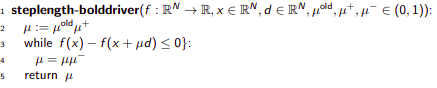

1) Defined a function named "bolddrive" to update steplength "mu". mu_plus & mu_minus are chosen as 1.1 and 0.5,mu_minus is in (0,1)<br>
2) Steplength is multiplied by mu_plus<br>
3) As per the above algorithm, while loop is used and loss functions as above are compared<br>.
4) If the condition satisfies,step length is reduced by  multiplying with mu_minus <br>
5) This bolddrive mechanism  is added in main function of learning betas. <br>
6) In each iteration,steplength is updated by "bolddrive" function with updated betas. <br>
7) In algorinth,$ d:=-\nabla f(x)$

In [22]:
def bolddrive(x,y,betas,mu):
    mu_plus,mu_minus=1.1,0.5
    mu=mu*mu_plus
    while f(x,y,betas) - f(x,y,betas - mu*grad_f(x,y,betas)) <= 0:    # in algorinth mu*d is = -mu*grad
        mu = mu_minus*mu
    return mu

In [23]:
def betas_bold(x_train,x_test,y_train,y_test,mu,imax,epsilon):
 
    betas=np.ones((x_train.shape[1],1))
    abs_loss=[]
    RMSE=[]
    for i in range(imax):
        f1=f(x_train,y_train,betas)
        
        #updating steplength using backtracking
        mu=bolddrive(x_train,y_train,betas,mu)
        #updating parameters:Gradient descent
        betas=gradient_desc(x_train,y_train,betas,mu)
        
        f2=f(x_train,y_train,betas)
        #f1-f2
        x=abs(f1-f2)
        abs_loss.append(x)
        # RMSE:
        RMSE.append(np.sqrt(np.mean((np.matmul(x_test,betas)-y_test)**2)))
        
        if abs(f1-f2) < epsilon:
            break
        
    return abs_loss,RMSE

### 3. Look-ahead optimizer please refer to publication here: https://arxiv.org/pdf/1907.08610.pdf

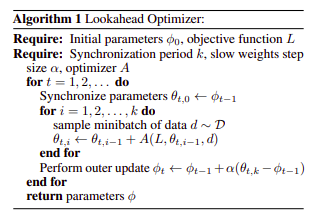

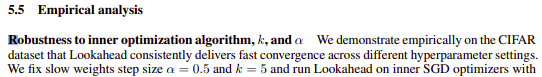

**Approach**
Following the above algorithm:<br>
1) Fast_weight θ, slow_weight φ  are initialised<br>
2) In the algorithm above, A is any optimizing function. Here in the paper SGD and Adam are taken. I used SGD<br>
3) For otimizing fast_weight in k steps, a function "SGD_K_steps" is created.<br>
4) The SGD optimizes taking only one instance of the data at a time randomly. For this, random.sample() is used which returns unique numbbers in the given range.<br>
5) As per the inner loop in algorithm, 2 loops are created. The first loop iterates over k steps . Second loop iterates over each instance. At the end of inner loop, fast_weight is updated  by gradient descent algorithm on each instance of data. This is repeated for k steps.<br>

6) A main learning function "lookahead" is created.<br>
7) alpha and  k are set to 0.5 & 5 as mentioned in Empirical analysis.<br>
8) fast_weight θ, slow_weight φ  are initialised<br>
9) As per the algorithm, for each iteration, fast_betas are assigned with slow_betas of previous iteration.<br>'
10) The fast weights are updated applying "SGD_k_steps" function.<br>
11) After k inner optimizer updates using "SGD_k_steps", the slow_weights are updated using the following equation as given in algorithm i.e $\phi_{t} \leftarrow \phi_{t-1}+\alpha\left(\theta_{t, k}-\phi_{t-1}\right)$.<br>
12) In the next iteration, the same slow_weight is assigned to fast_weight

In [24]:
import random
def SGD_K_steps(x,y,fast_weights,mu):
    sample_count=x.shape[0]
    random_number=random.sample(range(0,sample_count),k=sample_count)  
    
    for k in range(5):
        for i in random_number:
            x_sample=x[i][np.newaxis,:]  #for converting into 2d array
            y_sample=y[i][:,np.newaxis]  #for converting into 2d array
            fast_weights = gradient_desc(x,y,fast_weights,mu)
    return fast_weights

In [25]:
def lookahead(x_train,y_train,x_test,y_test,mu,imax,epsilon,alpha):
     
    fast_weights=np.ones((x_train.shape[1],1))
    slow_weights=np.ones((x_train.shape[1],1))
    abs_loss=[]
    RMSE=[]
    
    for i in range(imax):
        f1 = f(x_train,y_train,slow_weights)
        fast_weights=slow_weights
        fast_weights = SGD_K_steps(x_train,y_train,fast_weights,mu)
        slow_weights = slow_weights + 0.5*(fast_weights-slow_weights)
        f2=f(x_train,y_train,slow_weights)
        #f1-f2
        x=abs(f1-f2)
        abs_loss.append(x)
        # RMSE:
        RMSE.append(np.sqrt(np.mean((np.matmul(x_test,slow_weights)-y_test)**2)))
        if abs(f1-f2) < epsilon:
            break
        
    return abs_loss,RMSE,mu

#### Airq datset back tracking:

1)alpha=0.3 i.e in range(0,0.5) is taken<br>
2)beta i.e "bt" is taken as 0.9 from range of (0,1)<br>
3)300 iterations are taken <br>
4)Absolute loss difference and RMSE are plotted.
5)The same is repeated for all datasets

In [26]:
# Airq datset back tracking
back_abs_loss_a,back_RMSE_a,mu=betas_back(x_train_a,x_test_a,y_train_a,y_test_a,mu=1,alpha=0.3,bt=0.9,imax=300,
                                          epsilon=1)

#### Airq datset bolddrive

1)mu=1, imax=300 is taken<br>
2)mu+=1.1 mu_minus=0.5 is taken<br>
3)Absolute loss difference and RMSE are calculated using "betas_bold" function and plotted.<br>
4)The same is repeated for all datasets

In [27]:
bold_abs_loss_a,bold_RMSE_a=betas_bold(x_train_a,x_test_a,y_train_a,y_test_a,mu=1,imax=300,epsilon=1)

### Look Ahead- Airq datset 
Airq datset bolddrive
1)alpha=0.5, k=5 is chosen as mentioned in the paper<br>
2)imax=300 is chosen<br>
3)Absolute loss difference and RMSE are calculated using "lookahead" function and plotted.<br>
4)The same is repeated for all datasets.

In [28]:
look_abs_loss_a,look_RMSE_a,mu=lookahead(x_train_a,y_train_a,x_test_a,y_test_a,mu=1e-10,imax=300,alpha=0.5,
                                         epsilon=1)

### Plotting airq dataset against all steplegth controllers

All 6 plots of all steplength controllers are shown using subplots

**Comment is added below the graph.**

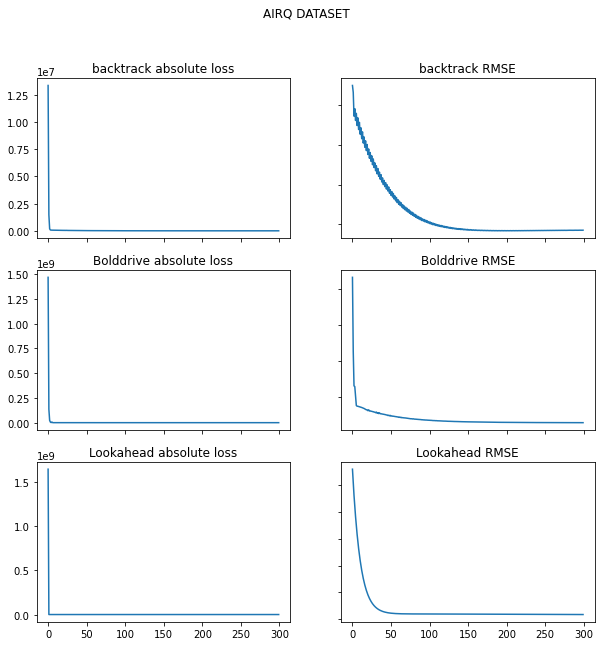

In [29]:
abs_list_RMSE_list=[back_abs_loss_a,back_RMSE_a,bold_abs_loss_a,bold_RMSE_a,look_abs_loss_a,look_RMSE_a]
step_type=['backtrack','Bolddrive','Lookahead']

fig, ax = plt.subplots(3, 2)
fig.set_figheight(10)
fig.set_figwidth(10)
fig.suptitle('AIRQ DATASET')
k=0
for i in range(3):
    for j in range(2):
        ax[i,j].plot(abs_list_RMSE_list[k])
        if j%2==0:
            ax[i,j].set_title(f"{step_type[i]} absolute loss")
        else:
            ax[i,j].set_title(f"{step_type[i]} RMSE")
        k+=1
for ax in fig.get_axes():
    ax.label_outer()

**Comment** <br>
From the above graphs, it is observed that, learning by bold drive is faster compared to backtrack. And learning by Lookahead method is converging the RMSE faster than others.

### Similarly for the Parkinsons data set , learning is done using all steplength controllers

In [30]:
# Parkinsons datset back tracking
back_abs_loss_p,back_RMSE_p,mu=betas_back(x_train_p,x_test_p,y_train_p,y_test_p,mu=1,alpha=0.3,bt=0.9,imax=300,
                                          epsilon=1)
# Parkinsons datset bolddrive
bold_abs_loss_p,bold_RMSE_p=betas_bold(x_train_p,x_test_p,y_train_p,y_test_p,mu=1,imax=300,epsilon=1)

# Parkinsons datset lookahead
look_abs_loss_p,look_RMSE_p,mu=lookahead(x_train_p,y_train_p,x_test_p,y_test_p,mu=1e-8,imax=300,alpha=0.5,
                                         epsilon=1)

### Declare a winning step-length controller based on the metric RMSE. You should tune the associated hyperparameters of the step-length controller(s).

**For AirQ Dataset:**

In [34]:
print(f"Minimum RMSE - Backtracking - {min(back_RMSE_a)}")
print(f"Minimum RMSE - Bolddrive - {min(bold_RMSE_a)}")
print(f"Minimum RMSE - lookahead- {min(look_RMSE_a)}")

Minimum RMSE - Backtracking - 28.381276552206597
Minimum RMSE - Bolddrive - 28.56209897827525
Minimum RMSE - lookahead- 25.585943732757215


#### By comparing minimum RMSE values of each dataset over three step controllers, the winning step length controller is "lookahead".